## Step 0: Load The Data

## Step 1: Dataset Summary & Exploration

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = 'Traffic_Signs_Data//Training//train.p'
validation_file = 'Traffic_Signs_Data//Validation//valid.p'
testing_file    = 'Traffic_Signs_Data//Testing//test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


### Basic Summary of the Data Set

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualization of the dataset

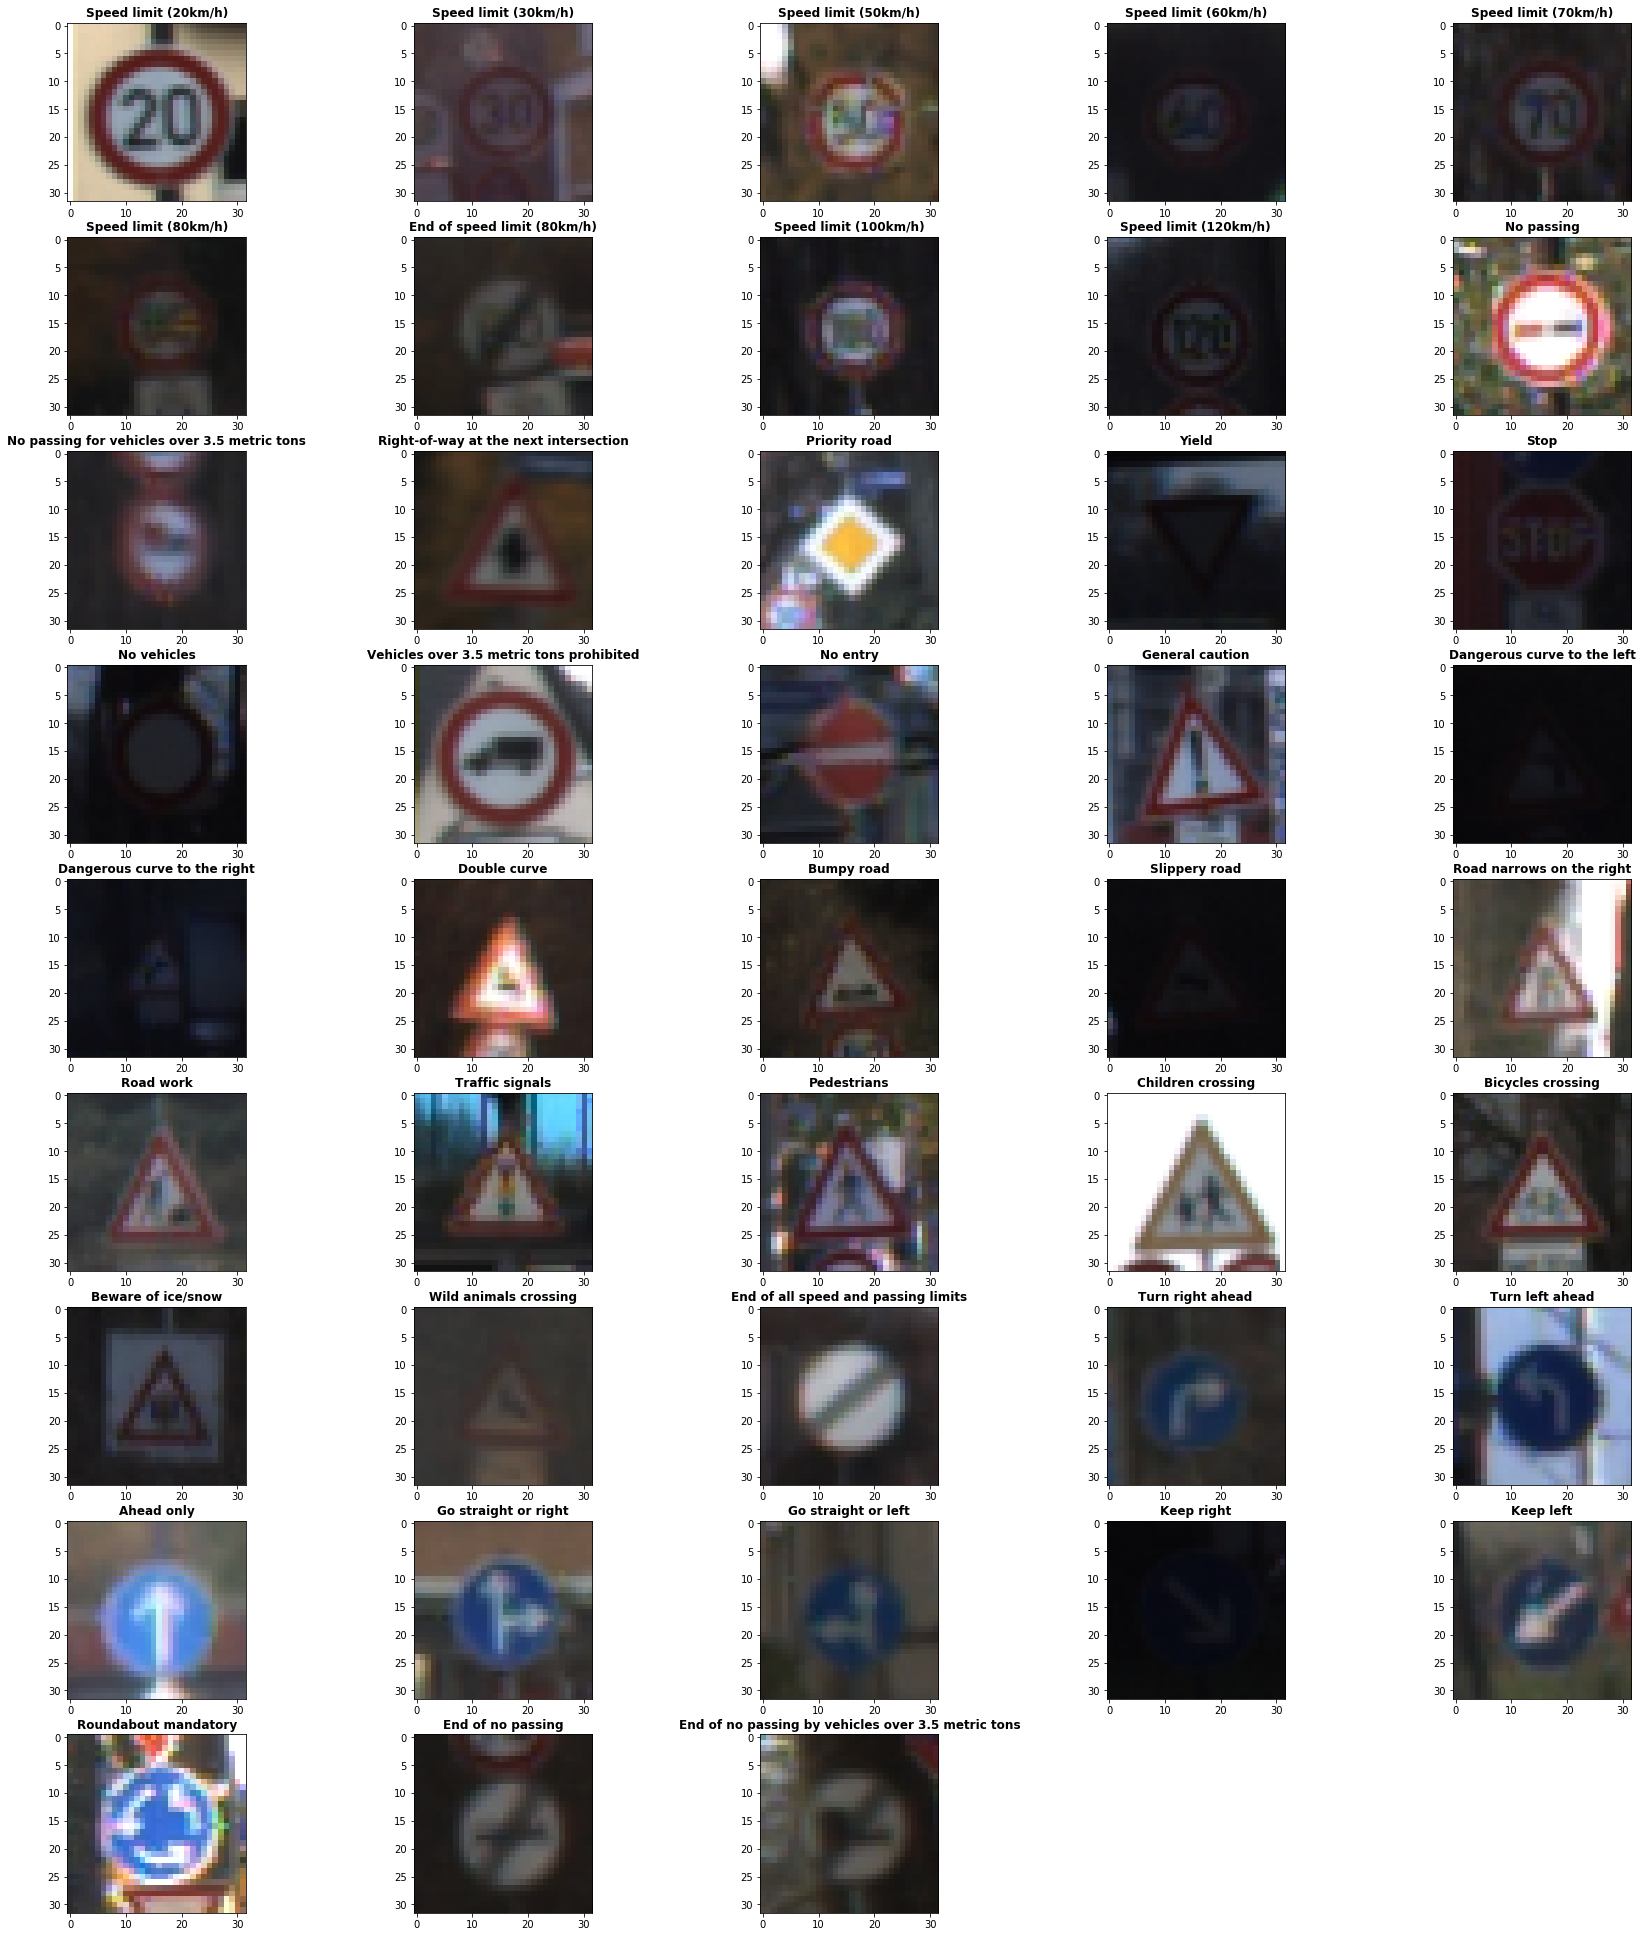

In [3]:
#Visualize the samples

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

columns=5
label_name = pd.read_csv('signnames.csv').values
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(top=1)
for index in range(n_classes):
    label = np.where(y_train==index)
    image = X_train[label[0][0]]
    fig1 = fig.add_subplot( int(n_classes/columns) + 1, columns, index + 1)
    fig1.set_title(label_name[index][1],fontsize=12,fontweight='bold')
    fig1.imshow(image)
plt.show()

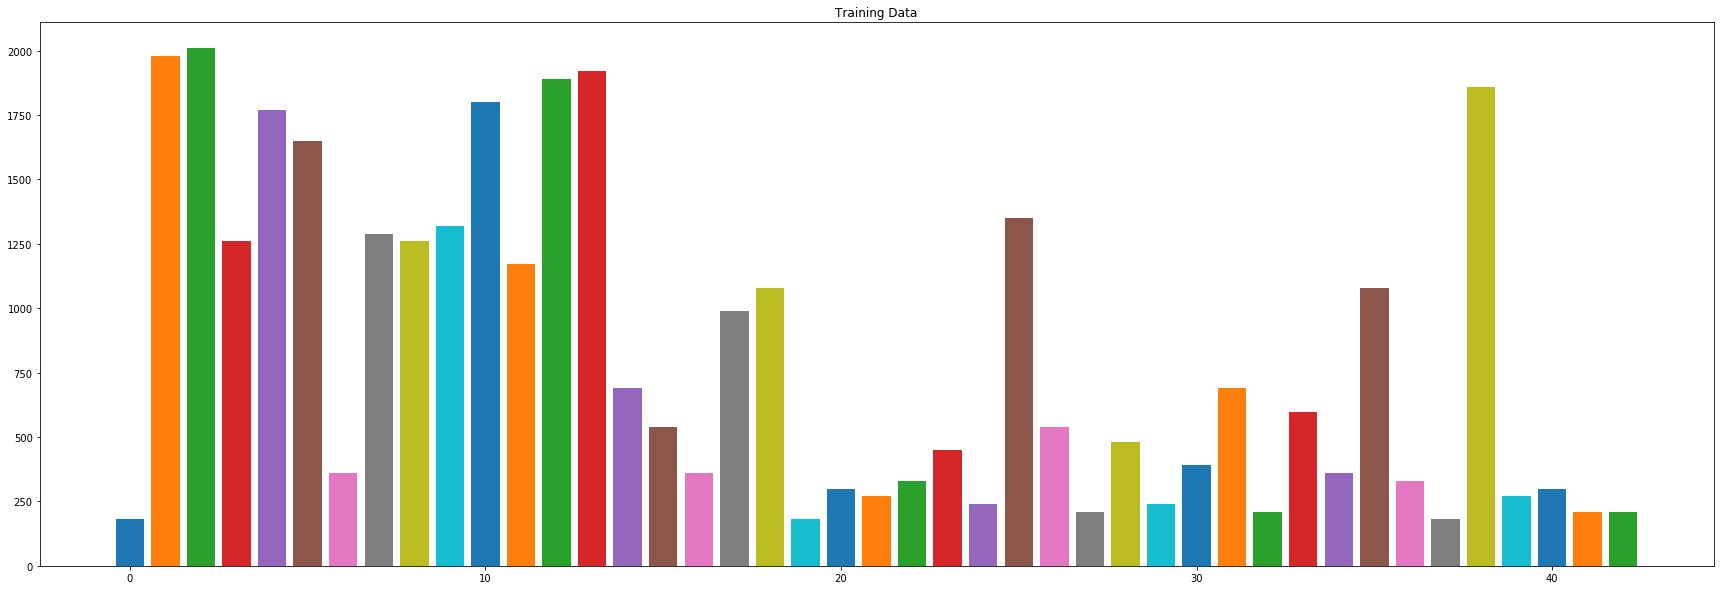

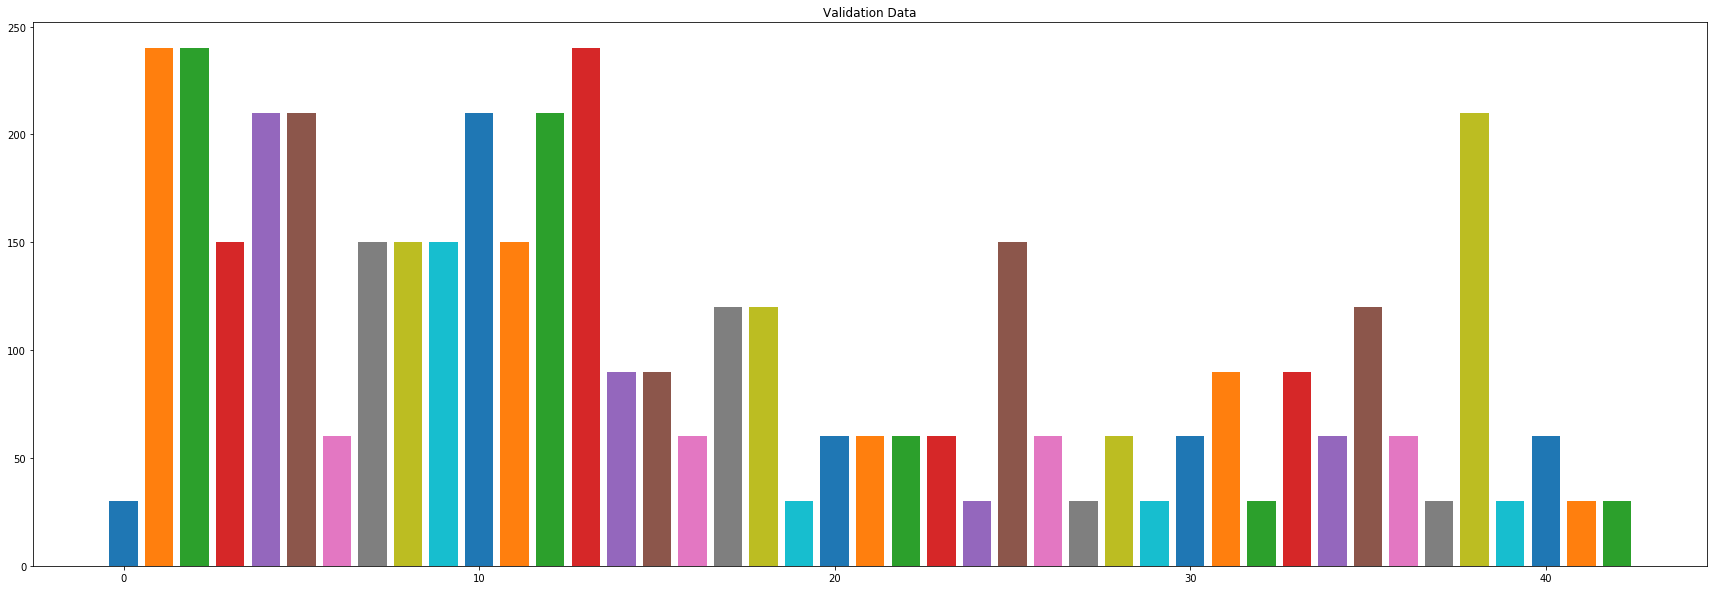

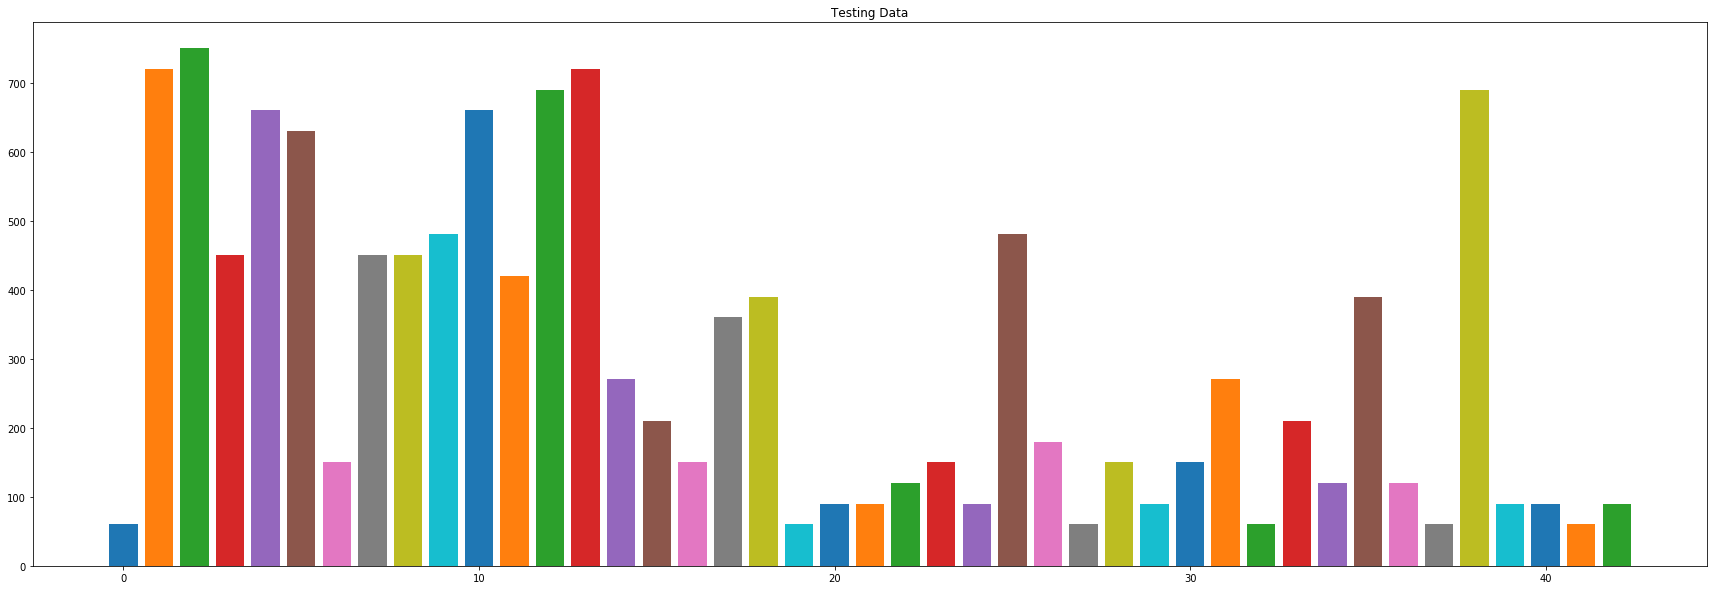

In [4]:
#Plotting the number of samples 

plt.figure(figsize=(30,10))
plt.title("Training Data")
for index in range(n_classes):
    label = np.where(y_train==index)
    plt.bar(index,len(y_train[label]))
plt.show()

plt.figure(figsize=(30,10))
plt.title("Validation Data")
for index in range(n_classes):
    label = np.where(y_valid==index)
    plt.bar(index,len(y_valid[label]))
plt.show()

plt.figure(figsize=(30,10))
plt.title("Testing Data")
for index in range(n_classes):
    label = np.where(y_test==index)
    plt.bar(index,len(y_test[label]))
plt.show()

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set

Plotting Samples of Modified Training Data......


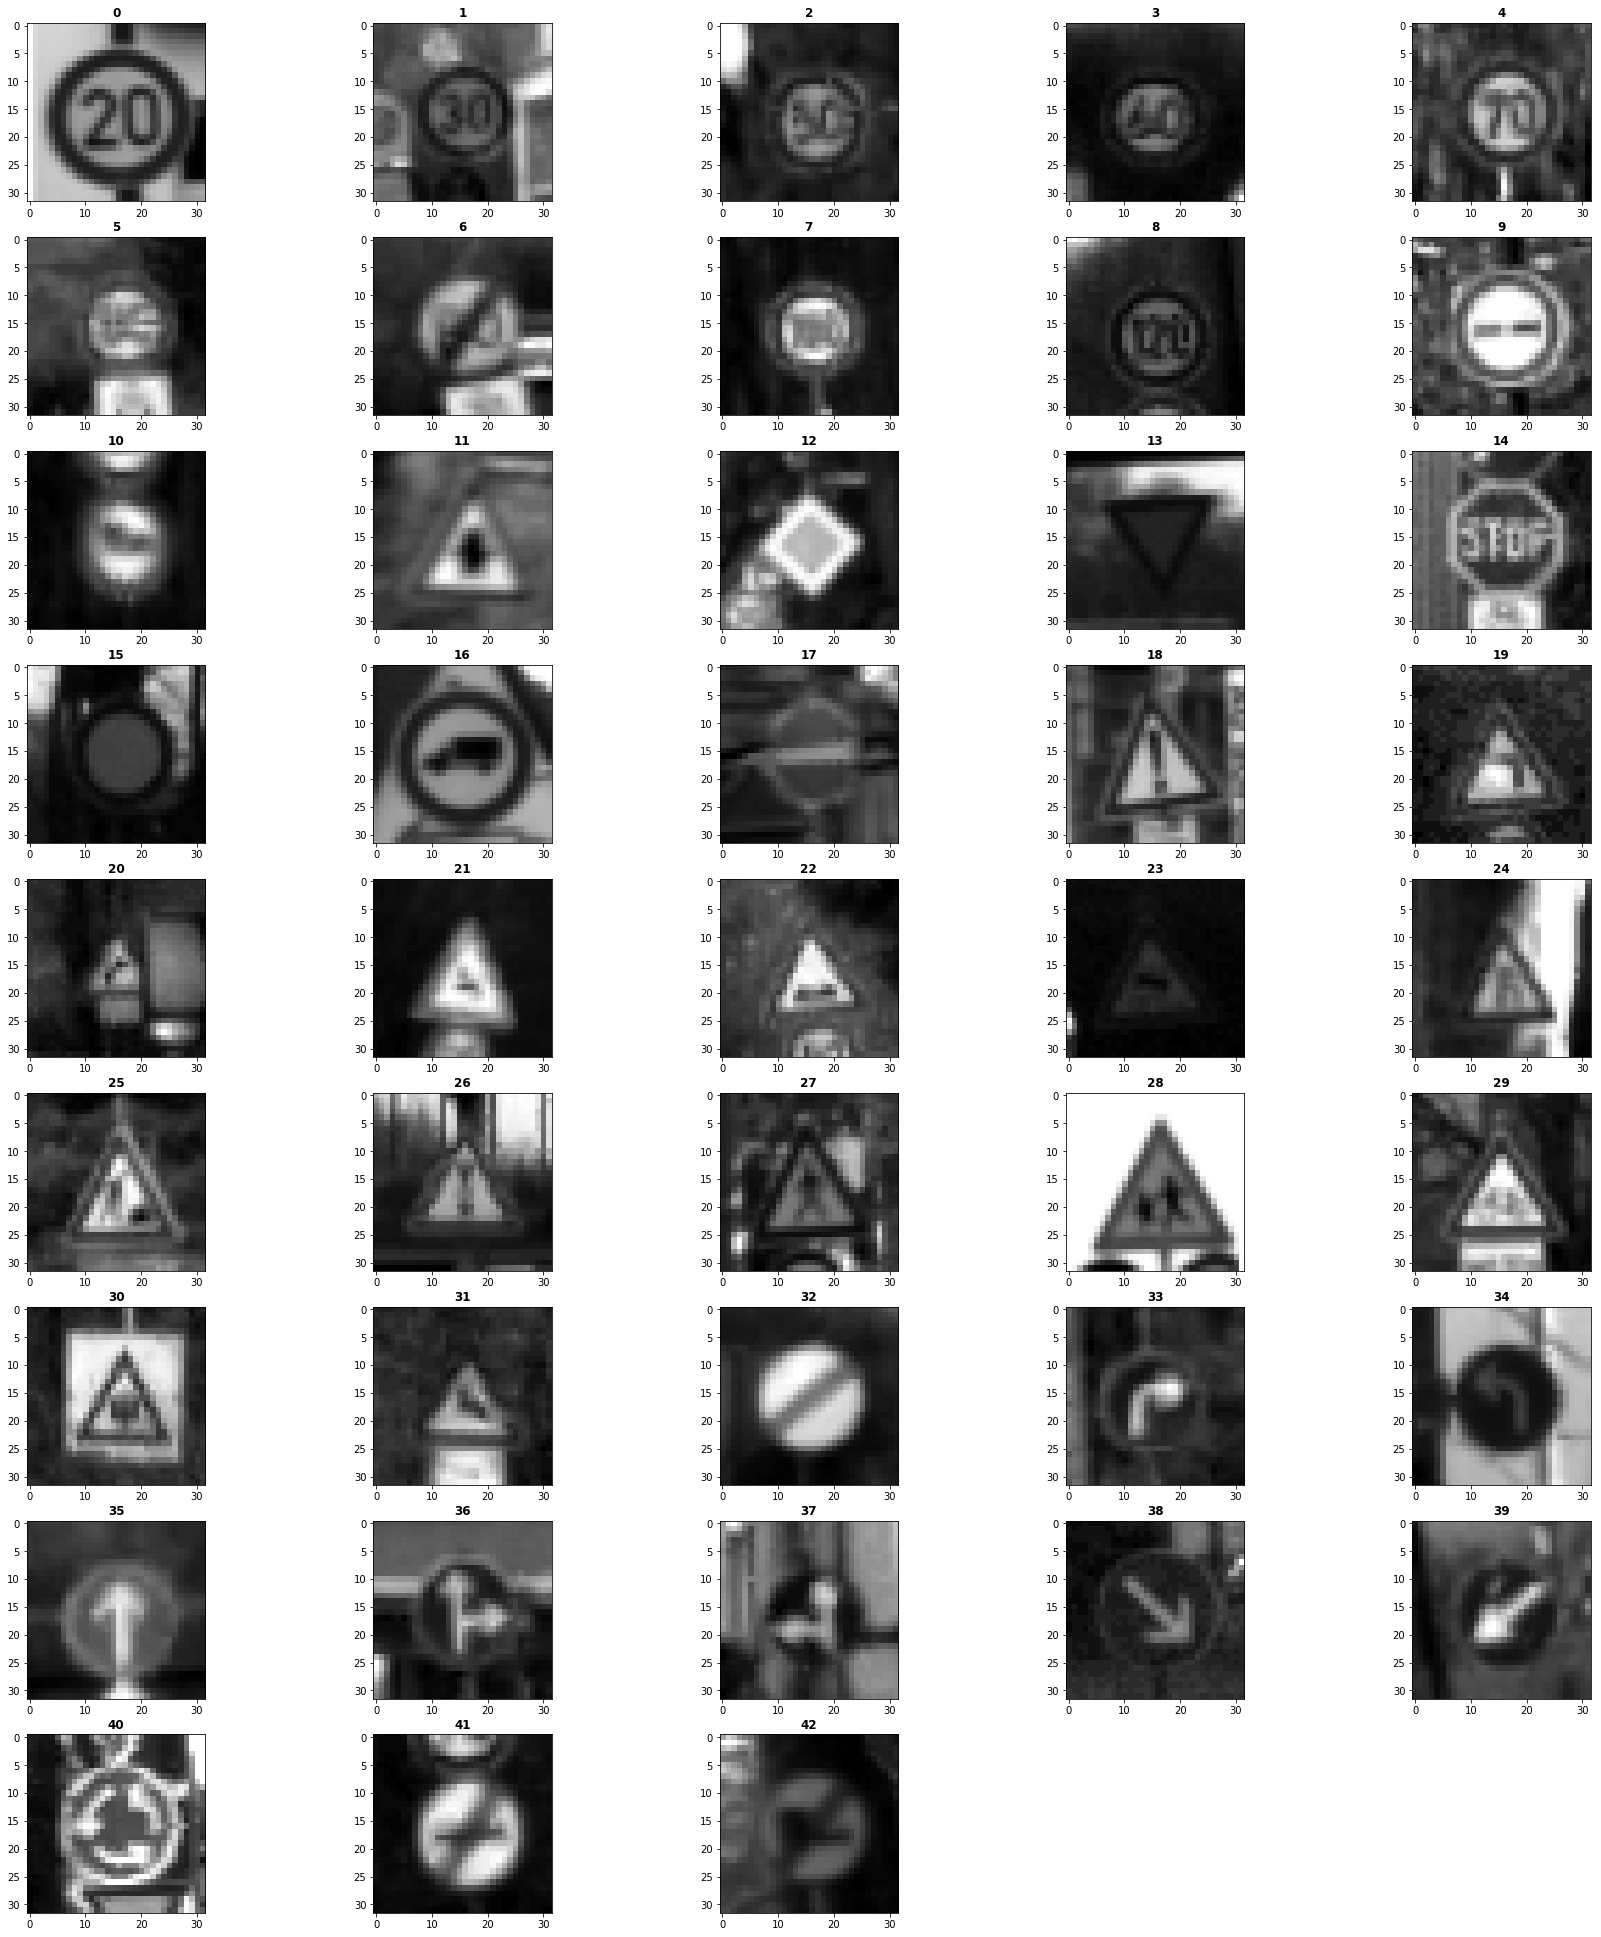

Plotting Samples of Modified Validation Data......


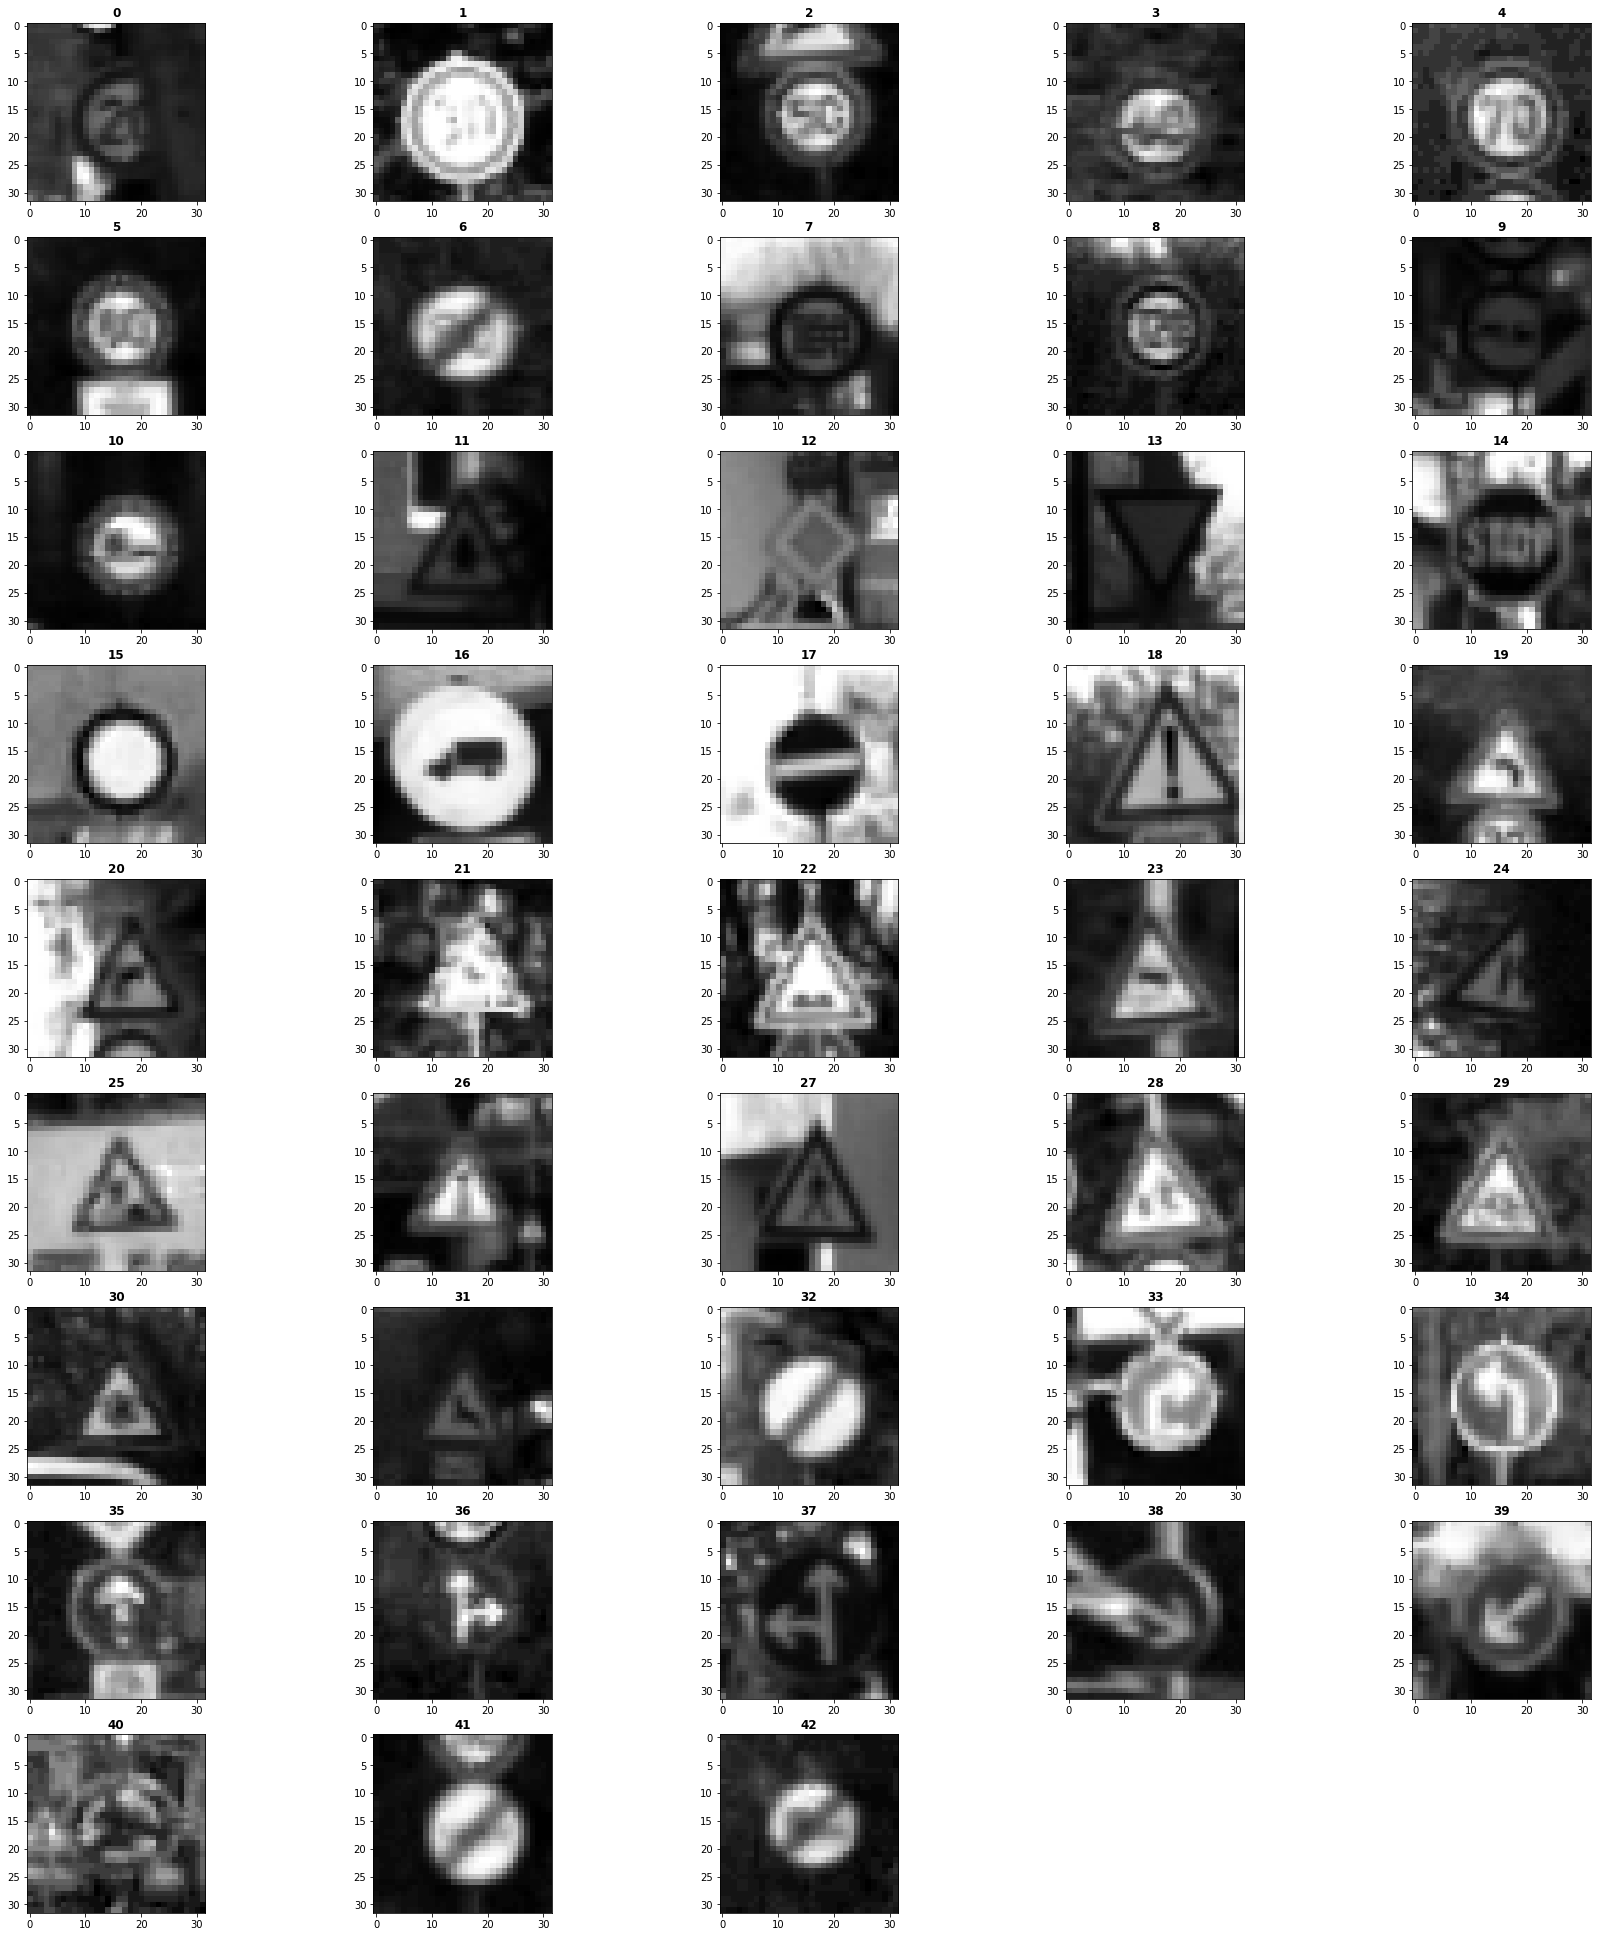

Plotting Samples of Modified Testing Data......


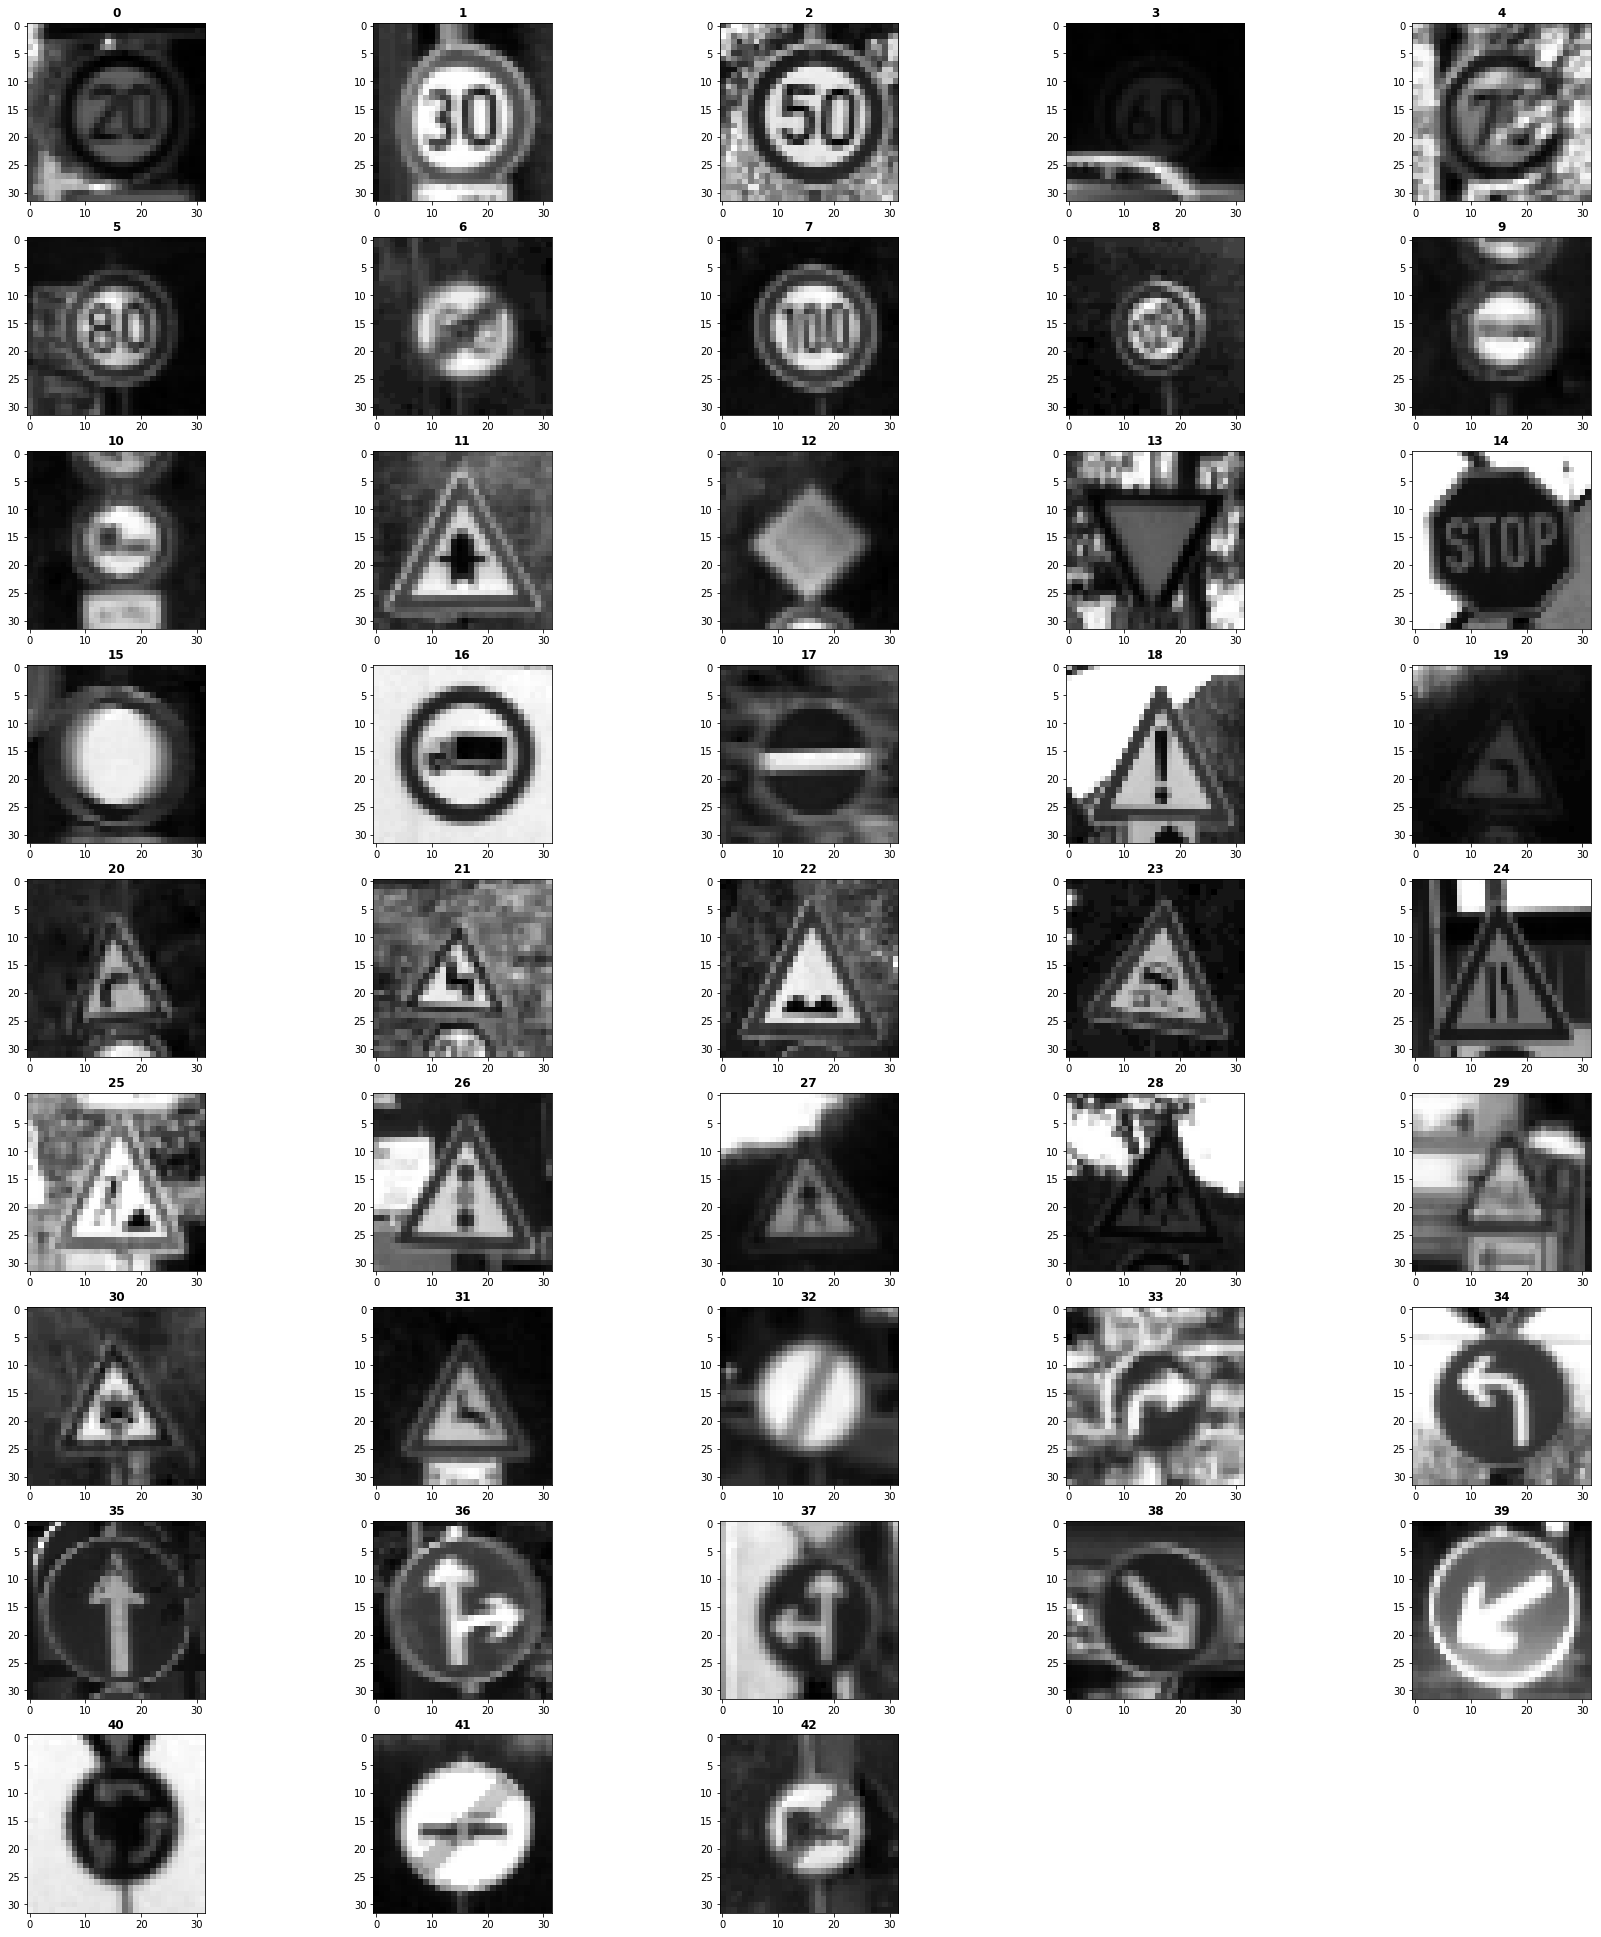

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.utils import shuffle

def grayscale_image(img):

    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return new_img

def normalize_image(img):
    
    a = 0.1
    b = 0.9
    Xmin = 0
    Xmax = 255
    return (a)+(((img - Xmin) * (b - a))/(Xmax - Xmin))

X_train_modified = []
X_valid_modified = []
X_test_modified = []
columns = 5
i=0

#Modify Training Data
for index in range(len(X_train)):
    img = X_train[index]
    gray_img = grayscale_image(img)
    normalized_img = normalize_image(gray_img).reshape(32,32,1)
    X_train_modified.append(normalized_img)
print("Plotting Samples of Modified Training Data......")
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(top=1)
for i in range (n_classes):
    for index in range(len(X_train)):
        if (i == y_train[index]):
            fig01 = fig.add_subplot( int(n_classes/columns) + 1, columns, i + 1)
            fig01.set_title(y_train[index],fontsize=12,fontweight='bold')
            fig01.imshow(X_train_modified[index].reshape(32,32),cmap='gray' )
            break
plt.show()   

#Modify Validation Data
for index in range(len(X_valid)):
    img = X_valid[index]
    gray_img = grayscale_image(img)
    normalized_img = normalize_image(gray_img).reshape(32,32,1)
    X_valid_modified.append(normalized_img)
print("Plotting Samples of Modified Validation Data......")
fig1 = plt.figure(figsize=(30,30))
fig1.subplots_adjust(top=1)    
for i in range (n_classes):
    for index in range(len(X_valid)):
        if (i == y_valid[index]):
            fig11 = fig1.add_subplot( int(n_classes/columns) + 1, columns, i + 1)
            fig11.set_title(y_valid[index],fontsize=12,fontweight='bold')
            fig11.imshow(X_valid_modified[index].reshape(32,32),cmap='gray' )
            break
plt.show()    

#modify Testing Data
for index in range(len(X_test)):
    img = X_test[index]
    gray_img = grayscale_image(img)
    normalized_img = normalize_image(gray_img).reshape(32,32,1)
    X_test_modified.append(normalized_img)
print("Plotting Samples of Modified Testing Data......")
fig2 = plt.figure(figsize=(30,30))
fig2.subplots_adjust(top=1) 
for i in range (n_classes):
    for index in range(len(X_test)):
        if (i == y_test[index]):
            fig21 = fig2.add_subplot( int(n_classes/columns) + 1, columns, i + 1)
            fig21.set_title(y_test[index],fontsize=12,fontweight='bold')
            fig21.imshow(X_test_modified[index].reshape(32,32),cmap='gray' )
            break
plt.show()

X_train_modified, y_train = shuffle(X_train_modified, y_train) 

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x10.
    layer1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 45), mean = mu, stddev = sigma))
    layer1_b = tf.Variable(tf.zeros(45))
    layer1   = tf.nn.conv2d(x, layer1_W, strides=[1, 1, 1, 1], padding='VALID')
    layer1   = tf.nn.bias_add(layer1, layer1_b)
    # Activation function of layer1.
    layer1 = tf.nn.relu(layer1)
    # Max Pooling of layer1. Input = 28x28x10. Output = 14x14x10.
    layer1 = tf.nn.max_pool(layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Input = 14x14x10. Output = 10x10x20.
    layer2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 45, 90), mean = mu, stddev = sigma))
    layer2_b = tf.Variable(tf.zeros(90))
    layer2   = tf.nn.conv2d(layer1, layer2_W, strides=[1, 1, 1, 1], padding='VALID')
    layer2   = tf.nn.bias_add(layer2, layer2_b)
    # Activation function of layer2.
    layer2 = tf.nn.relu(layer2)
    # Max Pooling of layer2. Input = 10x10x20. Output = 5x5x20.
    layer2 = tf.nn.max_pool(layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3: Convolutional. Input = 5x5x20. Output = 3x3x50.
    layer3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 90, 180), mean = mu, stddev = sigma))
    layer3_b = tf.Variable(tf.zeros(180))
    layer3   = tf.nn.conv2d(layer2, layer3_W, strides=[1, 1, 1, 1], padding='VALID')
    layer3   = tf.nn.bias_add(layer3, layer3_b)
    # Activation function of layer3.
    layer3 = tf.nn.relu(layer3)
    # Max Pooling of layer3. Input = 3x3x50. Output = 2x2x50.
    layer3 = tf.nn.max_pool(layer3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

    # Flatten your Date. Input = 14x14x20 + 5x5x40 + 2x2x80. Output = 2660.
    #flat_layer1 = flatten(layer1)
    #flat_layer2 = flatten(layer2)
    #flat_layer3 = flatten(layer3)
    flat = flatten(layer3)
    
    #flat = tf.concat_v2([flat_layer1,flat_layer3],1) 
    # Adding dropout after the convolutional layers
    flat = tf.nn.dropout(flat, keep_prob)
    
    # Layer 4: Fully Connected. Input = 600. Output = 120.
    layer4_W = tf.Variable(tf.truncated_normal(shape=(720, 120), mean = mu, stddev = sigma))
    layer4_b = tf.Variable(tf.zeros(120))
    layer4   = tf.matmul(flat, layer4_W)
    layer4   = tf.add(layer4,layer4_b)
    # Activation function of layer4.
    layer4 = tf.nn.relu(layer4)
    # Adding dropout of layer 4
    layer4 = tf.nn.dropout(layer4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    layer5_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    layer5_b = tf.Variable(tf.zeros(84))
    layer5   = tf.matmul(layer4, layer5_W)
    layer5   = tf.add(layer5,layer5_b)
    # Activation function of layer5.
    layer5 = tf.nn.relu(layer5)
    # Adding dropout of layer 5
    layer5 = tf.nn.dropout(layer5, keep_prob)
    
    # Layer 6: Fully Connected. Input = 84. Output = 43.
    layer6_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    layer6_b = tf.Variable(tf.zeros(n_classes))
    logits   = tf.matmul(layer5, layer6_W)
    logits   = tf.add(logits,layer6_b)
    
    return logits

### Train, Validate and Test the Model

### Features and Labels

In [7]:
x = tf.placeholder(tf.float32, (None,32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [8]:
rate = 0.0007
EPOCHS = 20
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Model Training

Training...

EPOCH 1 ...
Training Accuracy = 0.415
Validation Accuracy = 0.372

EPOCH 2 ...
Training Accuracy = 0.749
Validation Accuracy = 0.689

EPOCH 3 ...
Training Accuracy = 0.897
Validation Accuracy = 0.850

EPOCH 4 ...
Training Accuracy = 0.944
Validation Accuracy = 0.890

EPOCH 5 ...
Training Accuracy = 0.952
Validation Accuracy = 0.902

EPOCH 6 ...
Training Accuracy = 0.964
Validation Accuracy = 0.913

EPOCH 7 ...
Training Accuracy = 0.984
Validation Accuracy = 0.950

EPOCH 8 ...
Training Accuracy = 0.988
Validation Accuracy = 0.954

EPOCH 9 ...
Training Accuracy = 0.992
Validation Accuracy = 0.957

EPOCH 10 ...
Training Accuracy = 0.995
Validation Accuracy = 0.966

EPOCH 11 ...
Training Accuracy = 0.996
Validation Accuracy = 0.959

EPOCH 12 ...
Training Accuracy = 0.997
Validation Accuracy = 0.960

EPOCH 13 ...
Training Accuracy = 0.997
Validation Accuracy = 0.955

EPOCH 14 ...
Training Accuracy = 0.997
Validation Accuracy = 0.970

EPOCH 15 ...
Training Accuracy = 0.998
Valid

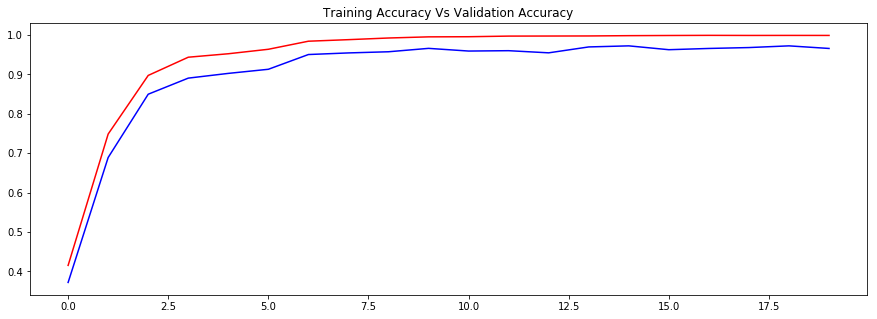

In [10]:
training_accuracy_list = []
validation_accuracy_list = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_modified)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_modified, y_train = shuffle(X_train_modified, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_modified[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(X_train_modified, y_train)
        training_accuracy_list.append(training_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        
        validation_accuracy = evaluate(X_valid_modified, y_valid)
        validation_accuracy_list.append(validation_accuracy)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    plt.figure(figsize = (15,5))
    plt.title('Training Accuracy Vs Validation Accuracy')
    plt.plot(range(EPOCHS),training_accuracy_list,'r')
    plt.plot(range(EPOCHS),validation_accuracy_list,'b')

### Model Testing

In [11]:
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_modified, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.951


## Step 3: Test a Model on New Images

### Load and Output the Images

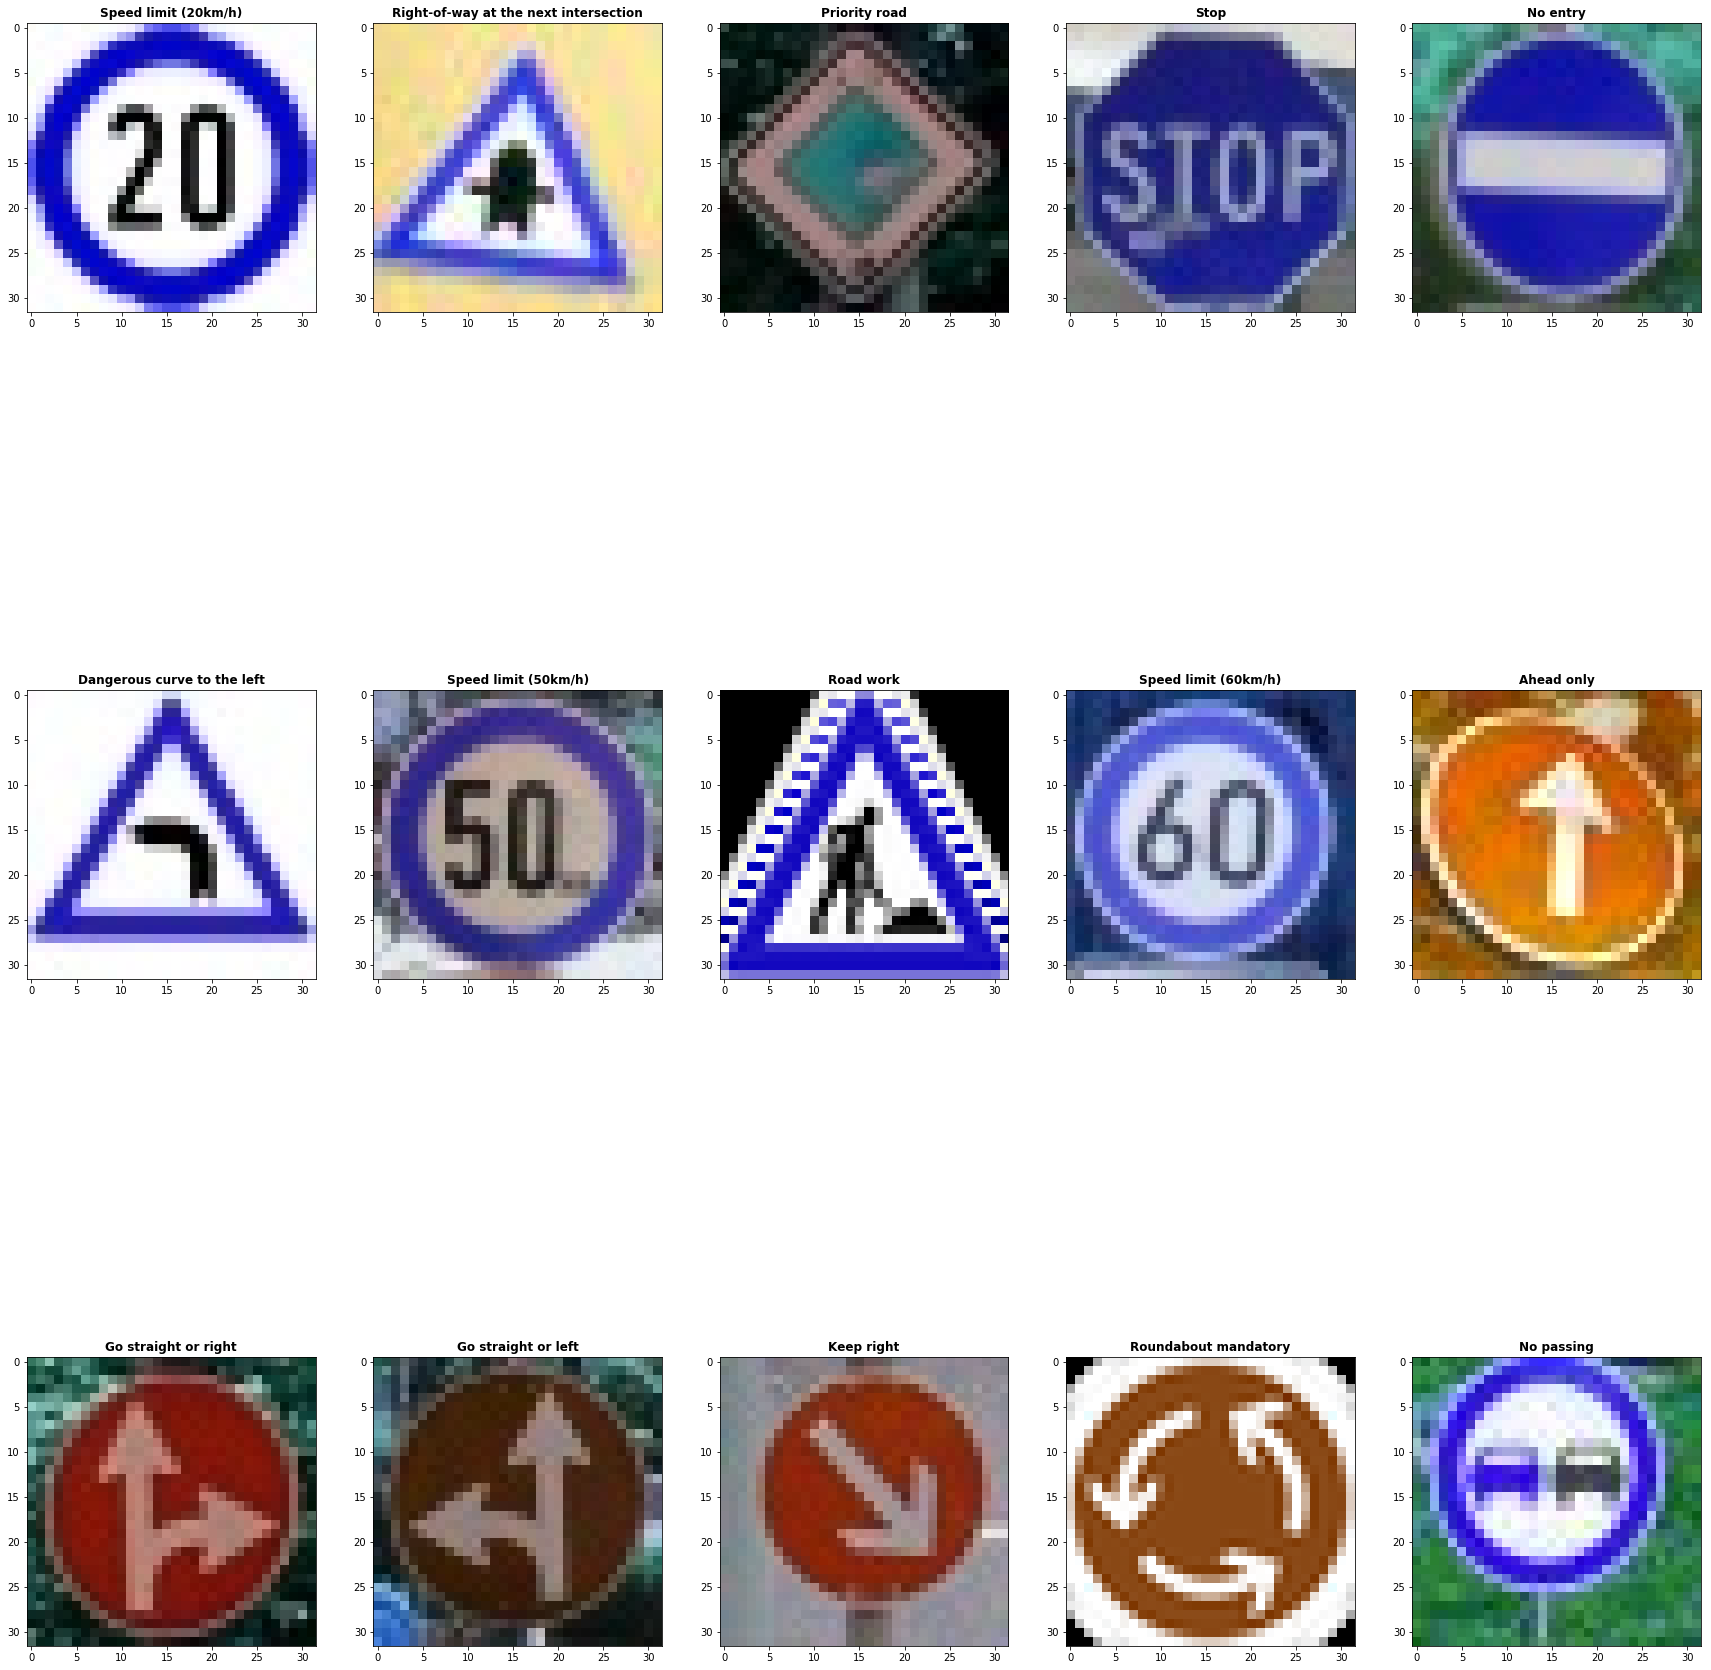

In [17]:
import os

images = np.array([], dtype='uint8')
Final = np.array([], dtype='uint8')
folder = 'Test Images'
columns=5
images_number = 15
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(top=1)
index = 0
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    images= np.append(images,img)
    labels = filename.split("-")
    Final = np.append(Final,labels[0])
    fig1 = fig.add_subplot( int(images_number/columns), columns, index + 1)
    fig1.set_title(label_name[int(Final[index])][1],fontsize=12,fontweight='bold')
    fig1.imshow(img)
    index+=1
plt.show()     
images=np.reshape(images,(images_number,32,32,3))

### Predict the Sign Type for Each Image

Plotting Modified Images ......


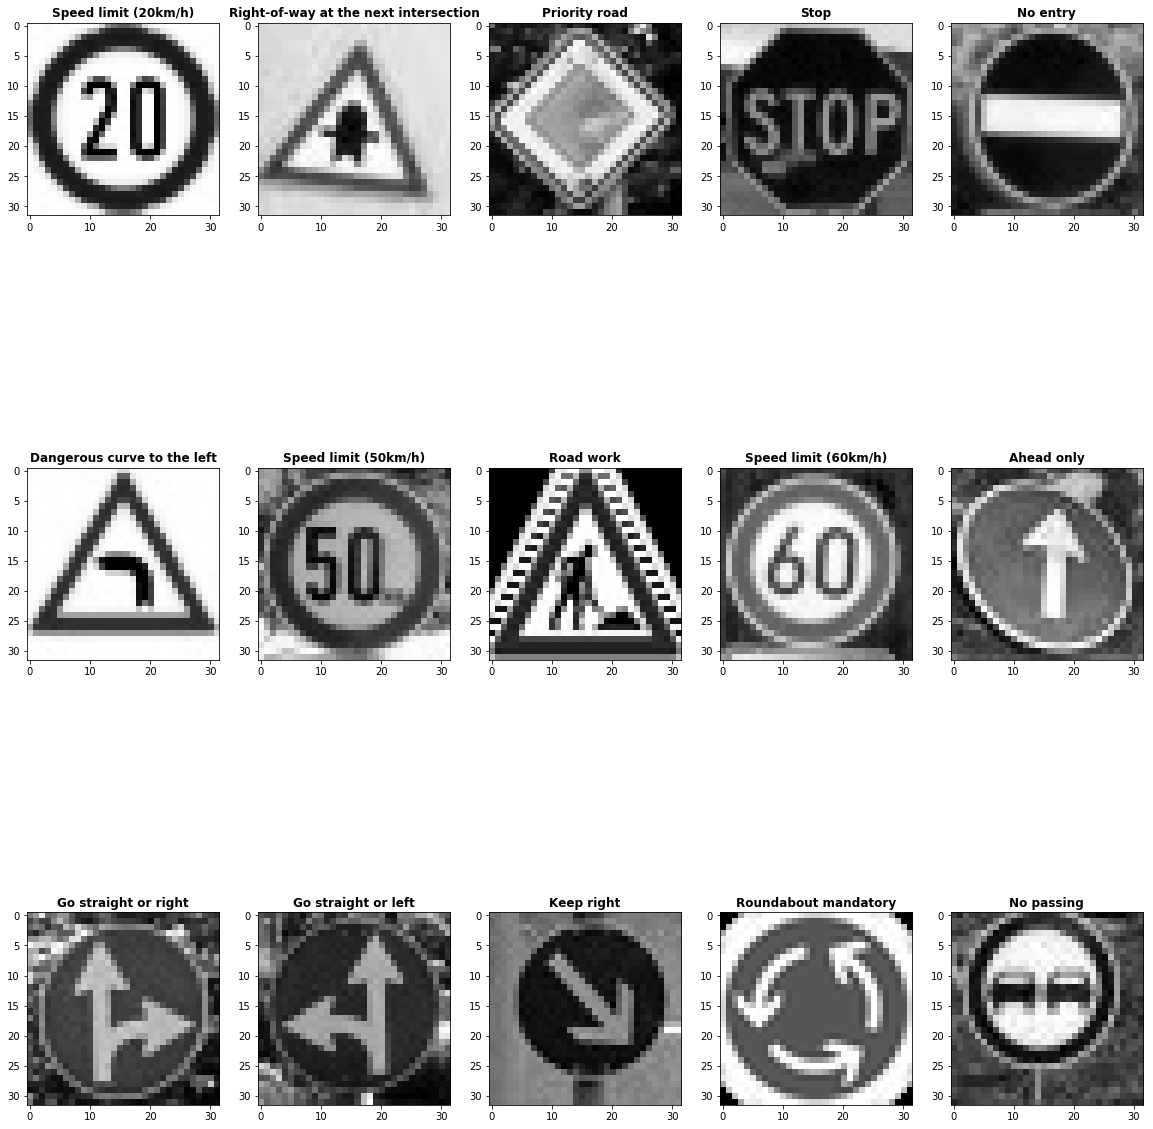

In [13]:
Images_modified =[]
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(top=1)
for index in range(len(images)):
    img = images[index]
    gray_img = grayscale_image(img)
    normalized_img = normalize_image(gray_img).reshape(32,32,1)
    Images_modified.append(normalized_img)
    #print(Images_modified.shape)
print("Plotting Modified Images ......")

for i in range (images_number):
    fig1 = fig.add_subplot( int(images_number/columns), columns, i + 1)
    fig1.set_title(label_name[int(Final[i])][1],fontsize=12,fontweight='bold')
    fig1.imshow(Images_modified[i].reshape(32,32),cmap='gray' )
plt.show()

### Analyze Performance

In [14]:
import tensorflow as tf
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(Images_modified, Final)
    softmax_out = sess.run(softmax, feed_dict={x: Images_modified, keep_prob: 1.0})
    top_k_out = sess.run(top_k, feed_dict={x: Images_modified, keep_prob: 1.0})
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.933


### Top 5 Softmax Probabilities

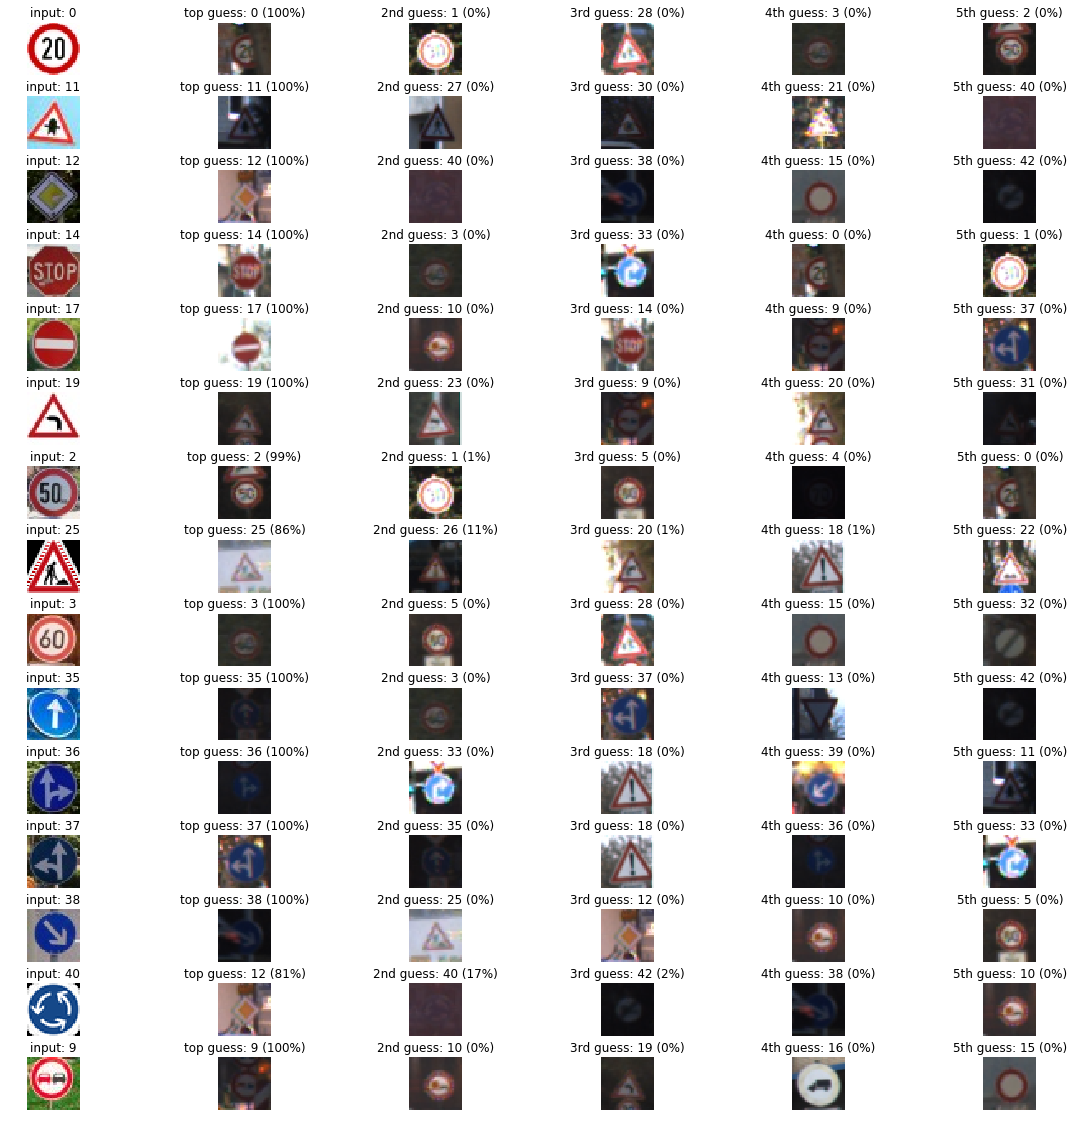

In [15]:
Columns = 6
fig, axs = plt.subplots(len(images),Columns, figsize=(20, 20))
fig.subplots_adjust(hspace = .4, wspace=.2)
axs = axs.ravel()
for i, image in enumerate(images):
    axs[Columns*i].axis('off')
    axs[Columns*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[Columns*i].set_title('input: {}'.format(int(Final[i])))
    guess1 = top_k_out[1][i][0]
    index1 = np.argwhere(y_valid == guess1)[0]
    axs[Columns*i+1].axis('off')
    axs[Columns*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
    axs[Columns*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*top_k_out[0][i][0]))
    guess2 = top_k_out[1][i][1]
    index2 = np.argwhere(y_valid == guess2)[0]
    axs[Columns*i+2].axis('off')
    axs[Columns*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
    axs[Columns*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*top_k_out[0][i][1]))
    guess3 = top_k_out[1][i][2]
    index3 = np.argwhere(y_valid == guess3)[0]
    axs[Columns*i+3].axis('off')
    axs[Columns*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
    axs[Columns*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*top_k_out[0][i][2]))
    guess4 = top_k_out[1][i][3]
    index4 = np.argwhere(y_valid == guess4)[0]
    axs[Columns*i+4].axis('off')
    axs[Columns*i+4].imshow(X_valid[index4].squeeze(), cmap='gray')
    axs[Columns*i+4].set_title('4th guess: {} ({:.0f}%)'.format(guess4, 100*top_k_out[0][i][3]))
    guess5 = top_k_out[1][i][4]
    index5 = np.argwhere(y_valid == guess5)[0]
    axs[Columns*i+5].axis('off')
    axs[Columns*i+5].imshow(X_valid[index5].squeeze(), cmap='gray')
    axs[Columns*i+5].set_title('5th guess: {} ({:.0f}%)'.format(guess5, 100*top_k_out[0][i][4]))

### Plot softmax probability

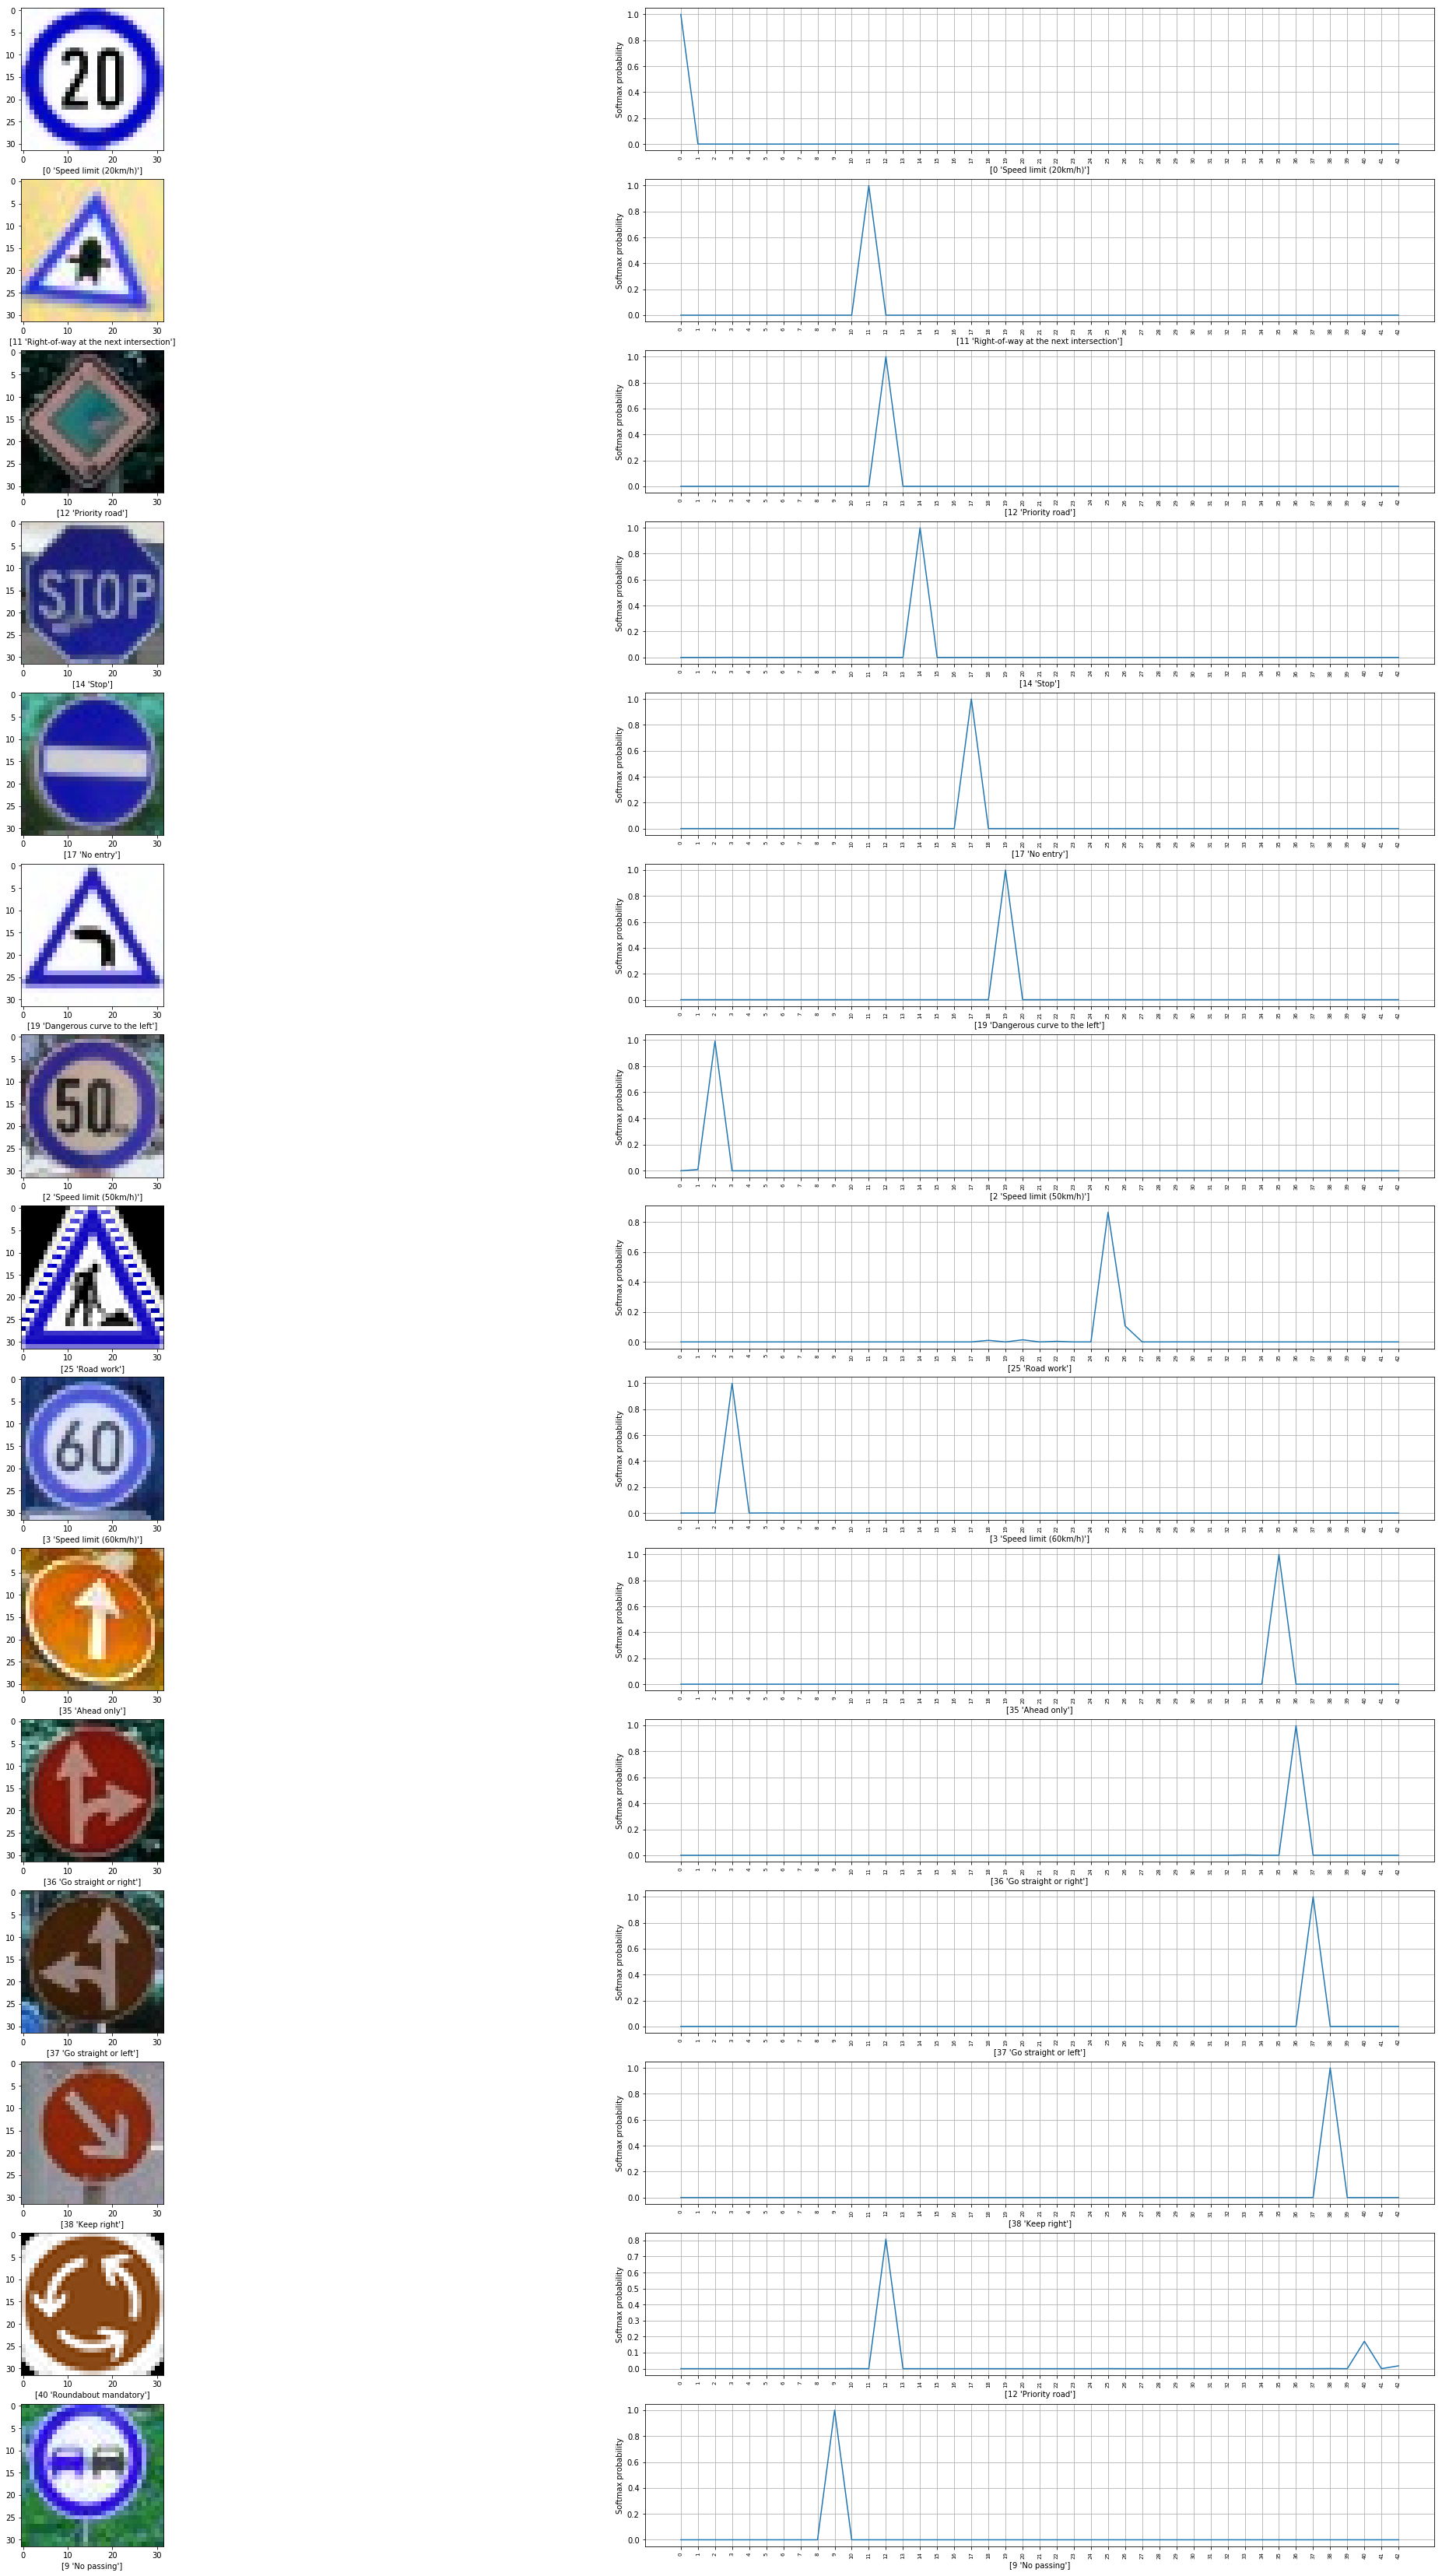

In [16]:
fig, ax = plt.subplots(images_number,2, figsize=(40,60))
ax = ax.ravel()
for i in range(len(softmax_out)*2):
    if i%2 == 0:
        ax[i].imshow(images[i//2])
        ax[i].set_xlabel(label_name[int(Final[i//2])])
    else:
        ax[i].set_xticks(np.arange(0,43,1))
        for tick in ax[i].xaxis.get_major_ticks():
            tick.label.set_fontsize('x-small') 
            tick.label.set_rotation('vertical')
        ax[i].plot(softmax_out[(i-1)//2])
        ax[i].set_ylabel('Softmax probability')
        ax[i].set_xlabel(label_name[top_k_out.indices[(i-1)//2][0]])
        ax[i].grid()
